# Calidad y limpieza

## Exploración de distribuciones

In [3]:
# Carga de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder


In [4]:
# Carga de datos. 
df = pd.read_excel('/Users/luciafrailemorera/00_TFM/dataset_wo_nulos.xlsx')

In [3]:
df.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
2   1855    Men        Apparel     Topwear      Tshirts       Grey  Summer   
3  18653    Men       Footwear  Flip Flops   Flip Flops      Black    Fall   
4  12369    Men        Apparel     Topwear       Shirts     Purple    Fall   

   year   usage                             productDisplayName  
0  2011  Casual               Turtle Check Men Navy Blue Shirt  
1  2011  Casual  Manchester United Men Solid Black Track Pants  
2  2011  Casual           Inkfruit Mens Chain Reaction T-shirt  
3  2011  Casual              Fila Men Cush Flex Black Slippers  
4  2011  Formal          Reid & Taylor Men Check Purple Shirts

# Exploración del dataset

Para comenzar, exploramos el dataset: cuantas muestras tiene, cuantas columnas y de que tipo.

In [4]:
df.shape

(13732, 10)

In [5]:
df.dtypes

id                     int64
gender                object
masterCategory        object
subCategory           object
articleType           object
baseColour            object
season                object
year                   int64
usage                 object
productDisplayName    object
dtype: object

Verificamos que los formatos de datos son correctos, y corregimos donde es necesario. 

In [6]:
df.select_dtypes("object").head()

gender masterCategory subCategory  articleType baseColour  season   usage  \
0    Men        Apparel     Topwear       Shirts  Navy Blue    Fall  Casual   
1    Men        Apparel  Bottomwear  Track Pants      Black    Fall  Casual   
2    Men        Apparel     Topwear      Tshirts       Grey  Summer  Casual   
3    Men       Footwear  Flip Flops   Flip Flops      Black    Fall  Casual   
4    Men        Apparel     Topwear       Shirts     Purple    Fall  Formal   

                              productDisplayName  
0               Turtle Check Men Navy Blue Shirt  
1  Manchester United Men Solid Black Track Pants  
2           Inkfruit Mens Chain Reaction T-shirt  
3              Fila Men Cush Flex Black Slippers  
4          Reid & Taylor Men Check Purple Shirts

In [7]:
#Pasamos de tipo object a tipo string
df_objects_as_strings = df.select_dtypes("object").astype(pd.StringDtype())

In [8]:
df_objects_as_strings.dtypes

gender                string[python]
masterCategory        string[python]
subCategory           string[python]
articleType           string[python]
baseColour            string[python]
season                string[python]
usage                 string[python]
productDisplayName    string[python]
dtype: object

In [9]:
#asignamos las nuevas columnas al dataframe original
df = df.assign(**df_objects_as_strings) # aquí aplicamos assign con "automatic unpacking" sobre las variables del dataframe
# Automatic unpacking : https://python-reference.readthedocs.io/en/latest/docs/operators/dict_unpack.html

In [10]:
df.dtypes

id                             int64
gender                string[python]
masterCategory        string[python]
subCategory           string[python]
articleType           string[python]
baseColour            string[python]
season                string[python]
year                           int64
usage                 string[python]
productDisplayName    string[python]
dtype: object

# Analisis exploratorio

In [17]:
df.describe()

id          year
count  13732.000000  13732.000000
mean   17012.426376   2012.164288
std     5715.502249      1.998167
min     1163.000000   2007.000000
25%    13210.750000   2011.000000
50%    17330.500000   2011.000000
75%    21532.250000   2012.000000
max    26053.000000   2018.000000

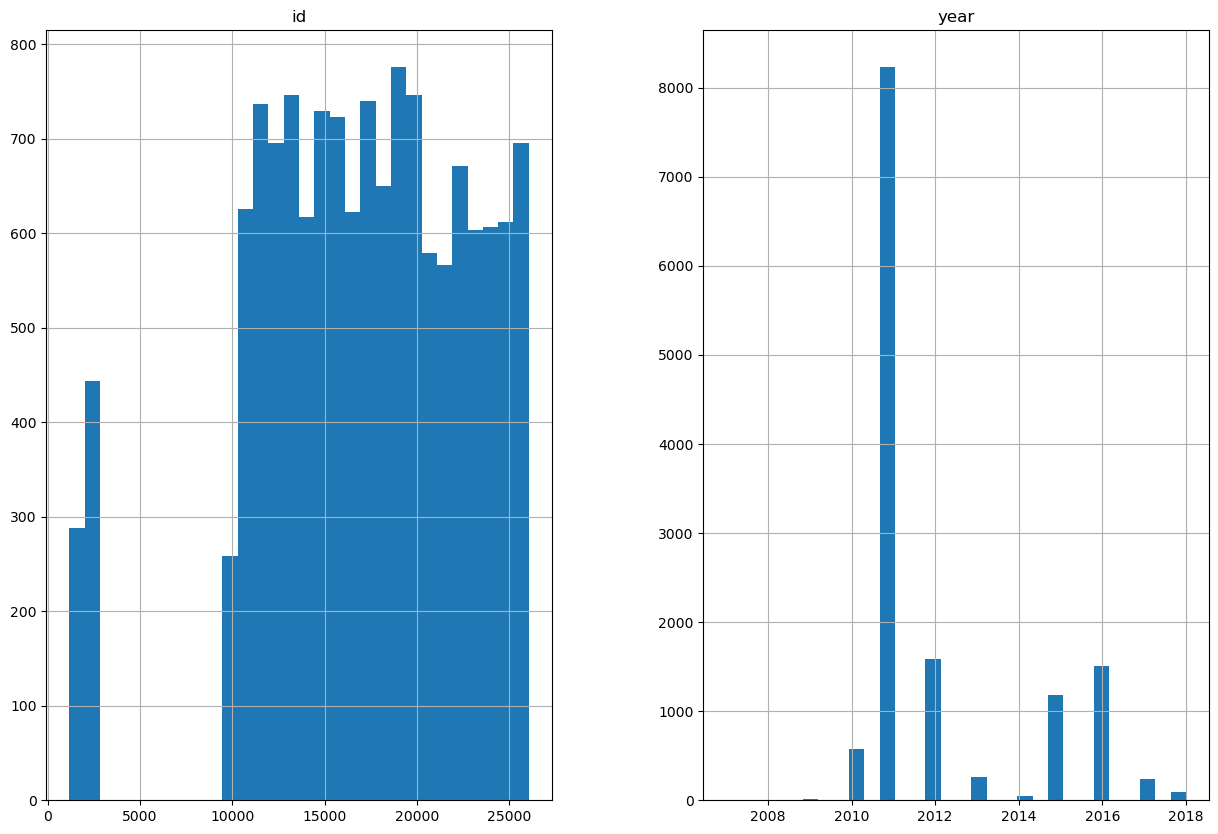

In [12]:
df.hist(bins=30, figsize=(15, 10))
plt.show()


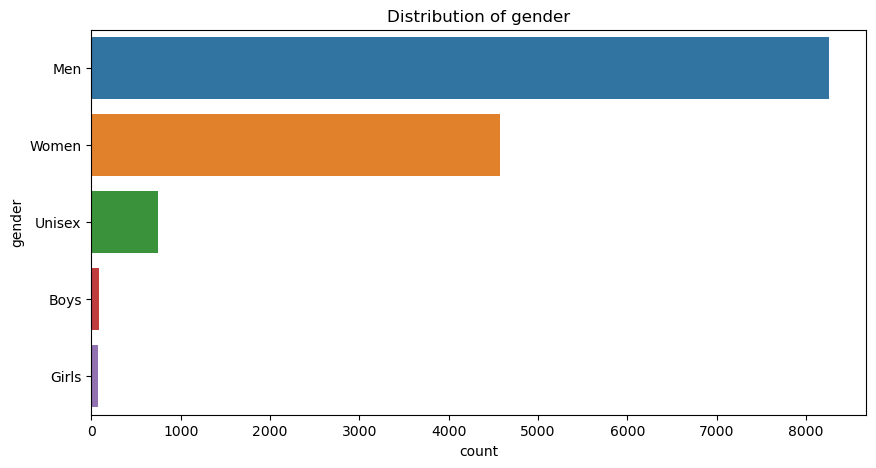

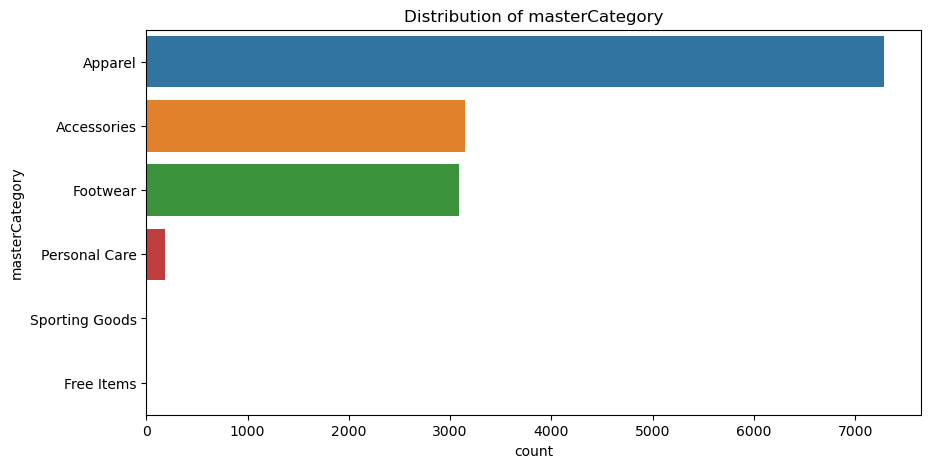

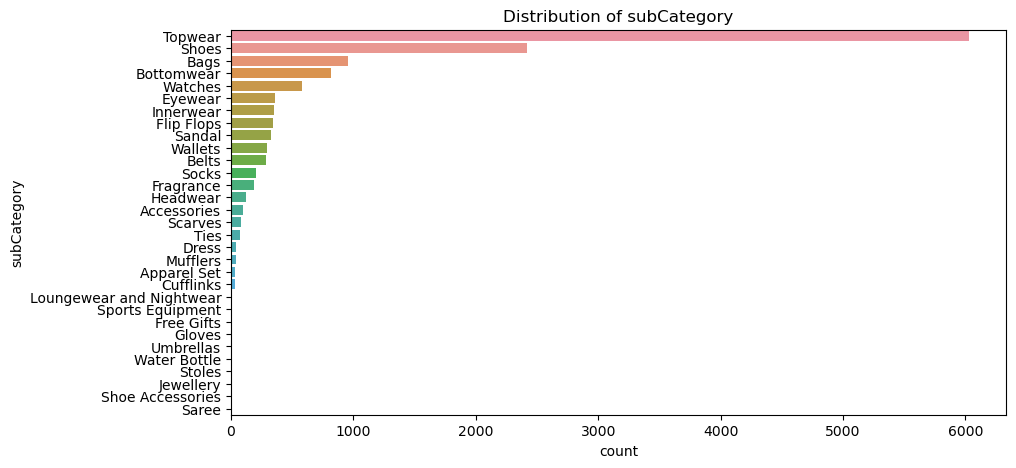

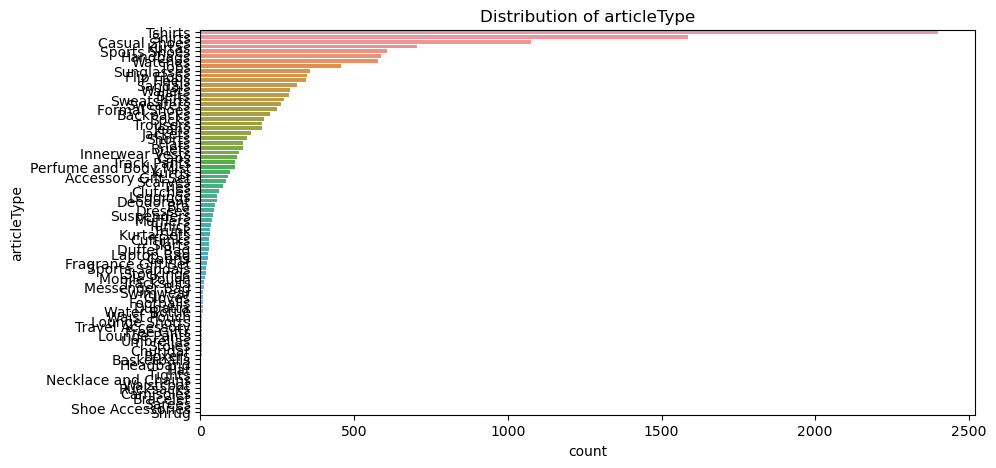

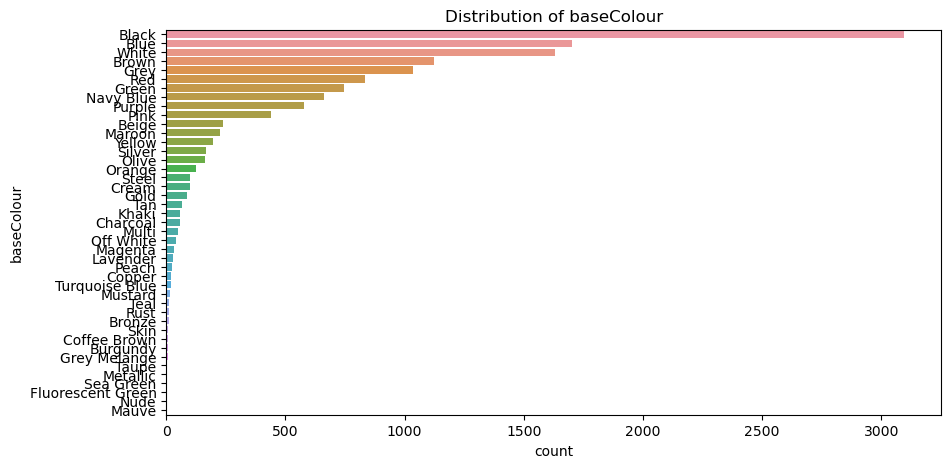

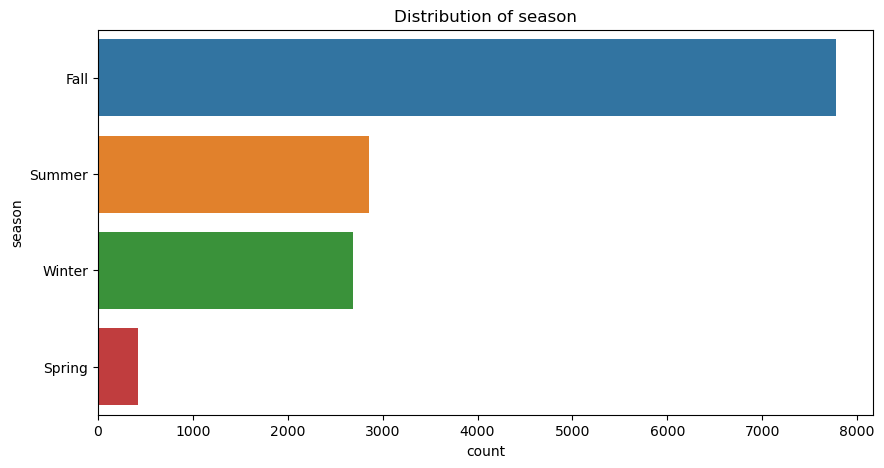

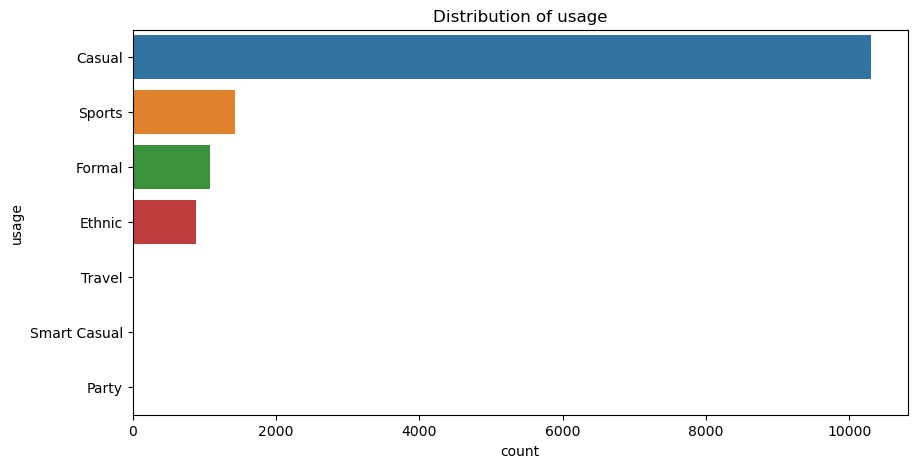

In [14]:
#Gráfico de barras para variables categóricas
categorical_cols = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour','season','usage']
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df, order = df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()
    


In [14]:
df.shape

(13732, 10)

In [18]:
filtro = df[df['masterCategory']=='Footwear']
filtro.shape

(0, 10)

In [21]:
len(df['productDisplayName'].unique())

10217

In [23]:
len(df['subCategory'].unique())

31

In [24]:
len(df['articleType'].unique())

80

Tambien es importante meterlo todo en un pipeline. 


Importante pensar en las metricas de error: 
1. Hacer pruebas de que a una persona elija una foto, y que ahi le saquen 10 imagenes, 5 sean recomendadas por el modelo y las otras 5 aleatorias y ver que elijiria. 
